# The Discovery of Handwashing

Prior to the nineteenth century, hygiene was frowned upon. People simply didn’t understand the risk of not washing their hands. This unreasonable behavior caused many deaths, especially in hospitals where most doctors-unlike today-never washed their hands before surgeries. 

In the mid-1800s, the Hungarian physician, **Dr. Ignaz Semmelweis**, decided to do something about this tragedy. He started investigating the reasons behind the deaths in Vienna general hospital and those of women giving birth in particular. After analyzing data from `Clinic 1 `and `Clinic 2`, it turned out the proportion of deaths in Clinic 1 is much **higher** than that in Clinic 2.

By looking further into why this happened, Dr. Semmelweis realized that many of the medical students who worked at Clinic 1 also spend a lot of time in the autopsy room as a part of their studies. So, he realized that dealing with corpses spread harmful bacteria that was transferred to the women giving birth, thus infecting them with the deadly childbed fever — the main reason for the high mortality rates.

Dr. Semmelweis ordered the doctors to **`wash their hands`** in the summer of 1847. From that point onwards, the proportion of deaths decreased by around 6.7 to 10 percentage points. Truly impressive!

Let's recreate the steps that someone did 200 years ago! But this time using advanced technology. This would help us appreciate what Dr. Semmelweis did and realize how one simple thing can truly save lives.

### Steps
1. Import necessary libraries
2. Read the yearly deaths dataset
3. Explore the dataset
4. Read and explore the monthly deaths dataset
5. Investigate the number of deaths from 1841 to 1846

### Part I - Yearly data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
# read yearly dataset
yearly_df = pd.read_csv("data/yearly_deaths_by_clinic.csv")

yearly_df

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [3]:
# shape of dataset
yearly_df.shape

(12, 4)

In [4]:
yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [5]:
# groupby per clinic births
yearly_df.groupby("clinic")['births'].sum()

clinic
clinic 1    20042
clinic 2    17791
Name: births, dtype: int64

In [6]:
# groupby per clinic deaths
yearly_df.groupby("clinic")['deaths'].sum()

clinic
clinic 1    1989
clinic 2     691
Name: deaths, dtype: int64

#### Observations
1. Above results show the number of `births` and `deaths` in two clinics from the year `1841 till 1846`. The number of deaths in `clinic 1` is **higher** than that of `clinic 2`.   

In [7]:
# calculate proportion of deaths
yearly_df["proportion of deaths"] = yearly_df["deaths"] / yearly_df["births"]

yearly_df

,year,births,deaths,clinic,proportion of deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [8]:
# separate dataset into 2 parts - one per clinic
clinic_1 = yearly_df[yearly_df["clinic"] == "clinic 1"]
clinic_2 = yearly_df[yearly_df["clinic"] == "clinic 2"]

In [9]:
clinic_1

,year,births,deaths,clinic,proportion of deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [10]:
clinic_2

,year,births,deaths,clinic,proportion of deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


Text(0, 0.5, 'number of deaths')

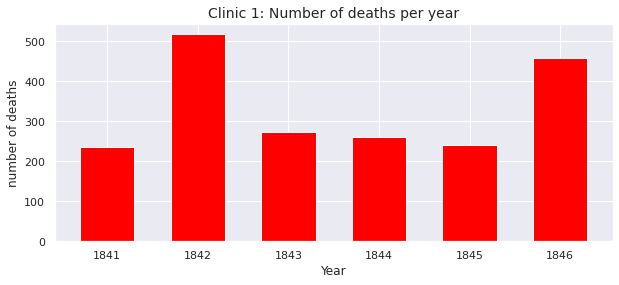

In [11]:
# Plot number of deaths every year in clinic 1
fig, ax = plt.subplots(figsize=(10,4))
plt.bar(clinic_1.year, clinic_1.deaths, width=0.6, color="red")
plt.title("Clinic 1: Number of deaths per year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("number of deaths", fontsize=12)

Text(0, 0.5, 'number of deaths')

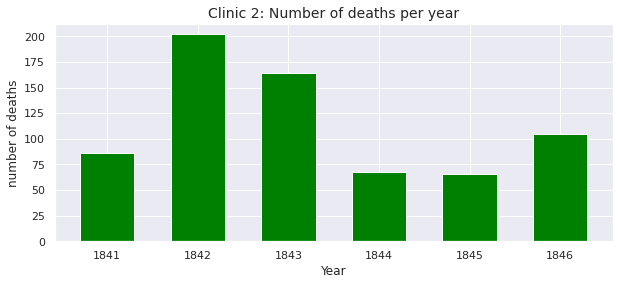

In [12]:
# Plot number of deaths every year in clinic 2
fig, ax = plt.subplots(figsize=(10,4))
plt.bar(clinic_2.year, clinic_2.deaths, width=0.6, color="green")
plt.title("Clinic 2: Number of deaths per year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("number of deaths", fontsize=12)

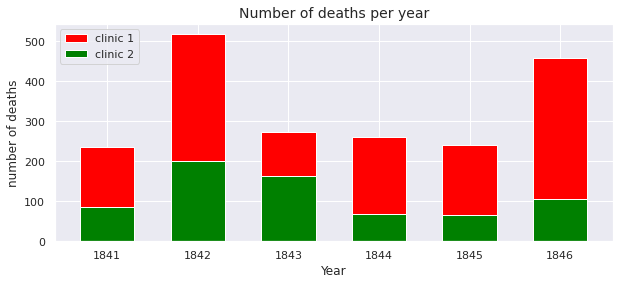

In [13]:
# combine these 2 plots to make it easier to compare
width = 0.6
fig, ax = plt.subplots(figsize=(10,4))
rects1 = plt.bar(clinic_1.year, clinic_1.deaths, width, label="clinic 1", color="red")
rects2 = plt.bar(clinic_2.year, clinic_2.deaths, width, label="clinic 2", color="green")
plt.title("Number of deaths per year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("number of deaths", fontsize=12)
plt.legend()

<AxesSubplot:xlabel='year', ylabel='Proportion of Deaths'>

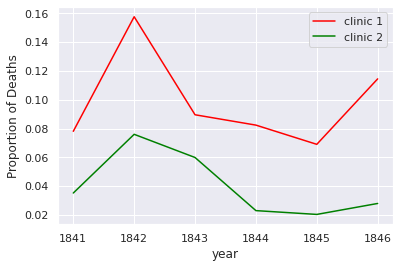

In [14]:
# plot proportion of deaths in clinic 1 and 2
ax = clinic_1.plot(x="year", y="proportion of deaths", label="clinic 1", color="red")
clinic_2.plot(x="year", y="proportion of deaths", label="clinic 2", ax=ax, ylabel= "Proportion of Deaths", color="green")

#### By looking further into why this happened, Dr. Semmelweis realized that many of the medical students who worked at Clinic 1 also spend a lot of time in the autopsy room as a part of their studies. So, he realized that dealing with corpses spread harmful bacteria that was transferred to the women giving birth, thus infecting them with the deadly childbed fever — the main reason for the high mortality rates.

### II - Monthly data

In [15]:
# read monthly dataset
monthly_df = pd.read_csv("data/monthly_deaths.csv")

monthly_df.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [16]:
monthly_df

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [17]:
monthly_df.shape

(98, 3)

In [18]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [19]:
# calculate proporation of deaths per month
monthly_df["proportion of deaths"] = monthly_df["deaths"] / monthly_df["births"]

monthly_df.head()

,date,births,deaths,proportion of deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


#### Doctors were ordered to wash their hands in the summer of 1847 to see if that will affect the number of deaths. With monthly data, let's trace the number of deaths before and after handwashing started.

In [20]:
# change dtype for 'date' column from string to datetime
monthly_df['date'] = pd.to_datetime(monthly_df['date'])
monthly_df.dtypes

date                    datetime64[ns]
births                           int64
deaths                           int64
proportion of deaths           float64
dtype: object

In [21]:
monthly_df

,date,births,deaths,proportion of deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
93,1848-11-01,310,9,0.029032
94,1848-12-01,373,5,0.013405
95,1849-01-01,403,9,0.022333
96,1849-02-01,389,12,0.030848


In [22]:
# Label the date at which handwashing started to "start_handwashing"
start_handwashing = pd.to_datetime('1847-06-01')

# split monthly_df into 2 parts - before and after handwashing
before_washing = monthly_df[monthly_df["date"] < start_handwashing]
after_washing = monthly_df[monthly_df['date'] >= start_handwashing]

In [23]:
before_washing

,date,births,deaths,proportion of deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
71,1847-01-01,311,10,0.032154
72,1847-02-01,312,6,0.019231
73,1847-03-01,305,11,0.036066
74,1847-04-01,312,57,0.182692


In [24]:
after_washing

,date,births,deaths,proportion of deaths
76,1847-06-01,268,6,0.022388
77,1847-07-01,250,3,0.012000
78,1847-08-01,264,5,0.018939
79,1847-09-01,262,12,0.045802
80,1847-10-01,278,11,0.039568
81,1847-11-01,246,11,0.044715
82,1847-12-01,273,8,0.029304
83,1848-01-01,283,10,0.035336
84,1848-02-01,291,2,0.006873
85,1848-03-01,276,0,0.000000


### before handwashing

Text(0, 0.5, 'Proportion of Deaths')

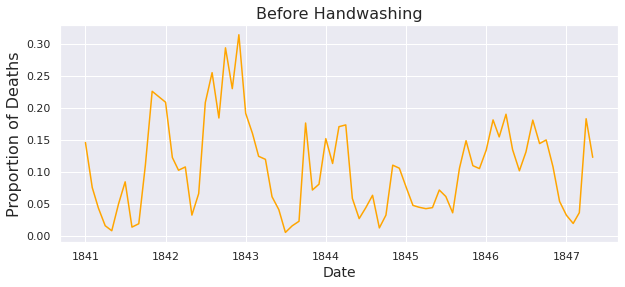

In [25]:
# plot proportion of deaths
fig, ax = plt.subplots(figsize=(10,4))
x = before_washing["date"]
y = before_washing["proportion of deaths"]
plt.plot(x, y, color='orange')
plt.title("Before Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=16)

### after handwashing

Text(0, 0.5, 'Proportion of Deaths')

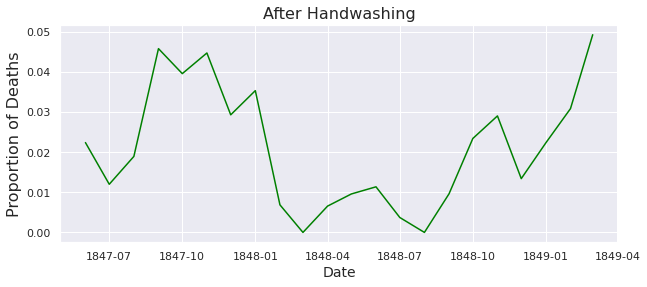

In [26]:
# plot proportion of deaths
fig, ax = plt.subplots(figsize=(10,4))
x = after_washing["date"]
y = after_washing["proportion of deaths"]
plt.plot(x, y, color='green')
plt.title("After Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=16)

<AxesSubplot:xlabel='date', ylabel='Proportion deaths'>

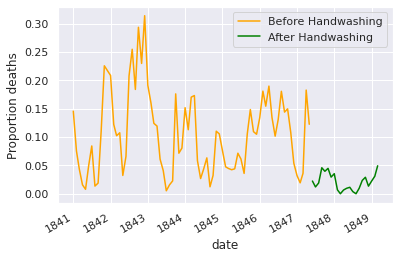

In [27]:
# Combine above 2 charts to see difference clearly
ax = before_washing.plot(x = "date", y = "proportion of deaths", label="Before Handwashing", color="orange")
after_washing.plot(x ="date", y="proportion of deaths", label="After Handwashing", ax=ax, ylabel="Proportion deaths", color="green")

#### Conclusion
1. Proportion of deaths dramatically **decreased** after handwashing was made obligatory

In [28]:
# Let's calculate exactly how much did handwashing decreased the proportion of deaths on average
before_proportion = before_washing["proportion of deaths"]
after_proportion = after_washing["proportion of deaths"]

In [29]:
before_proportion

0     0.145669
1     0.075314
2     0.043321
3     0.015686
4     0.007843
        ...   
71    0.032154
72    0.019231
73    0.036066
74    0.182692
75    0.122449
Name: proportion of deaths, Length: 76, dtype: float64

In [30]:
after_proportion

76    0.022388
77    0.012000
78    0.018939
79    0.045802
80    0.039568
81    0.044715
82    0.029304
83    0.035336
84    0.006873
85    0.000000
86    0.006557
87    0.009585
88    0.011364
89    0.003717
90    0.000000
91    0.009615
92    0.023411
93    0.029032
94    0.013405
95    0.022333
96    0.030848
97    0.049261
Name: proportion of deaths, dtype: float64

In [31]:
before_proportion.mean()

0.10504998260908793

In [32]:
after_proportion.mean()

0.021093375097254535

In [33]:
# Calculate the difference between both proportions
mean_diff = after_proportion.mean() - before_proportion.mean()

mean_diff

-0.0839566075118334

#### Conclusion
1. The minus sign indicates that there is a `decrease`. So handwashing decreased the proportion of deaths from **10%** to approx. **8%**.